# Usando Estadistica Descriptiva con Python y Pandas.


- En este notebook vamos a calcular la media, Varianza, la deviacion estandar, coVarianza y correlacion y tambien vamos a ver estos datos utilizando algunas tecnicas de Visulizacion de datos con matplotlib para asi entender mas en profundidad lo que estamos haciendo.

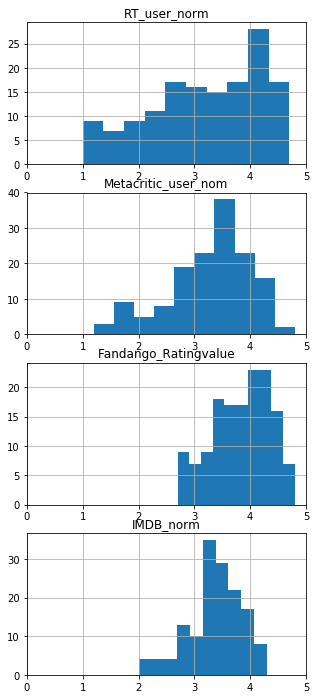

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
movie_reviews = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/fandango/fandango_score_comparison.csv")

scores = ["RT_user_norm", "Metacritic_user_nom", "Fandango_Ratingvalue", "IMDB_norm"]

fig = plt.figure(figsize=(5, 12))
for i, sc in enumerate(scores):
    fig.add_subplot(4, 1, i+1)
    ax = movie_reviews[sc].plot(kind='hist')
    ax.set_xlim([0, 5])
    ax.set_ylabel('')
    ax.set_title(sc)
    ax.grid()
   
plt.show()


# Media


- Vamos a calcular algunas medidas estadisticas para ver que sugieren los datos visualizados en los histogramas. 

In [12]:
def calc_mean(data):
    mean = data.mean()
    return mean

sel_cols = ['RT_user_norm', 'Metacritic_user_nom', 'Fandango_Ratingvalue', 'IMDB_norm']

user_review = movie_reviews[sel_cols]

rt_mean, mc_mean, fg_mean, id_mean = user_review.apply(calc_mean)

print(rt_mean)

3.19383561644


In [13]:
print(mc_mean)

3.2595890411


In [14]:
print(fg_mean, id_mean)

3.84520547945 3.36849315068



# Varianza y Desviacion Estandar.



- Parece que Fandango_user_reviews tienen la media mas alta y esta mas sesgado hacia la derecha, comparado con las reviews de los otros sitios. 

>Vamos a calcular la Varianza y la desviacion estandar para entender mejor la dispersion de estos.

In [15]:

def calc_mean(series):
    vals = series.values
    mean = sum(vals) / len(vals)
    return mean

def calc_variance(series):
    mean = calc_mean(series)
    variance = [ (x - mean) **2 for x in series]
    variance = sum(variance) / len(variance)
    return variance

def calc_stdev(series):
    variance = calc_variance(series)
    return variance ** (1/2)

rt_var, mc_var, fg_var, id_var = user_review.apply(calc_variance)
rt_stdev, mc_stdev, fg_stdev, id_stdev = user_review.apply(calc_stdev)


In [16]:
print(rt_var, mc_var, fg_var, id_var)

0.995578438731 0.566654625633 0.251107149559 0.228219647213


In [17]:
print(rt_stdev, mc_stdev, fg_stdev, id_stdev)

0.997786770173 0.752764654878 0.501105926486 0.47772340032


# Scatter Plots


- Vamos a explorar si Fandango's user rating es al menos relativamente correcto. Mas precisamente, ¿Estan las peliculas, que tienen un alto rating, en Rotten Tomatoes, IMDB, y Metacritic tambien con un rating alto en Fandango?

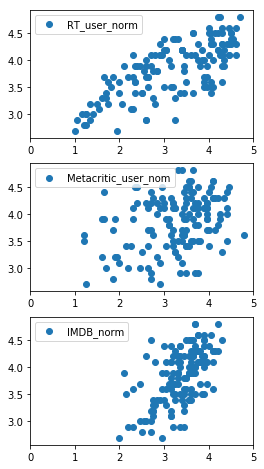

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (4, 8))
scores = ["RT_user_norm", "Metacritic_user_nom", "IMDB_norm", "Fandango_Ratingvalue"]
for i in range(0,3):
    fig.add_subplot(3, 1, i+1)
    ax = plt.scatter(movie_reviews[scores[i]], movie_reviews[scores[3]], label=scores[i])
    plt.xlim(0.0, 5.0)
    plt.legend()
    
    
plt.show()

# COVarianza

- Parece que Rotten Tomatoes y IMDB son los que mjor correlacionan con Fandango user reviews, mientras que Metacritic solo correlaciona levemente.

- Vamos a escribir una funcion para calcular los valores de la covarianza y una funcion para calcular la correlacion.

Aqui esta la formula para computar la covarianza entre 2 variables: cov(x,y)=∑(xi−x¯)(yi−y¯)/n.


In [19]:
def calc_covariance(x, y):
    x_mean = calc_mean(x)
    y_mean = calc_mean(y)
    
    x_diff = [nx - x_mean for nx in x]
    y_diff = [ny - y_mean for ny in y]
    
    xy_mult = [ (x_diff[i] * y_diff[i]) for i in range(0,len(x_diff))]
    
    covariance = sum(xy_mult) / len(x)
    
    return covariance

scores = ["RT_user_norm", "Metacritic_user_nom", "IMDB_norm", "Fandango_Ratingvalue"]

rt_fg_covar = calc_covariance(movie_reviews[scores[0]], movie_reviews[scores[3]]) 
mc_fg_covar = calc_covariance(movie_reviews[scores[1]], movie_reviews[scores[3]]) 
id_fg_covar = calc_covariance(movie_reviews[scores[2]], movie_reviews[scores[3]]) 


In [20]:
print(rt_fg_covar, mc_fg_covar, id_fg_covar)

0.362162225558 0.127100769375 0.143718802777


# Correlacion

- Es interesate como, Rotten Tomatoes cavaria altamente con Fandango (0.36) comparado con Matacritic (0.13) e IMDB (0.14)

- Vamos a calcular a correlacion usando unas funciones programadas por nosotros para esto en el paso siguiente.

- Esta es la formula de la covarianza.
     
     cov(x,y)/σxσy.

    
    Donde Cov, es la funcion de covarianza y σ representa la desviacion estandar.
    
    

In [21]:
def calc_correlation(x, y):
    covariance = calc_covariance(x, y)
    correlation = covariance / ((calc_variance(x) ** (1/2)) * (calc_variance(y) ** (1/2)))
    
    return correlation


rt_fg_corr = calc_correlation(movie_reviews["RT_user_norm"], movie_reviews["Fandango_Ratingvalue"])
mc_fg_corr = calc_correlation(movie_reviews["Metacritic_user_nom"], movie_reviews["Fandango_Ratingvalue"])
id_fg_corr = calc_correlation(movie_reviews["IMDB_norm"], movie_reviews["Fandango_Ratingvalue"])

In [22]:
print(rt_fg_corr, mc_fg_corr, id_fg_corr)

0.724328994249 0.336945314265 0.600354177263



- Tal y como el "scatter plot" sugirrio, Rotten Tomatoes e IMDB correlacionan fuertemente con Fandango, como valores de correlacion tenemos 0.72 y 0.60 respectivametne. MEtacritic, por otra parte, solo tiene un valor de correlacion de 0.34 con Fandango.


- Mientras la coVarianza y la correlacion pueden parece complicados de computar y dificies de razonar, su uso es para comparar relaciones tal y como hemos hecho y esta es una rutina que debemos seguir en cualquier proyecto pues debemos ver que datos estan relacionados entre si para poder mas tarde hacer un analisis mas en profundidad como veremos en proximos posts.